# Herramienta aplicada unidad 4
## Ejemplo de clasificación de fraudes


Una aplicación común de Machine Learning es la detección de fraudes en transacciones financieras. 
En este notebook, se presenta un ejemplo de cómo implementar una detección de fraudes utilizando algoritmos de Machine Learning en Python.

En esta oportunidad, usaremos el lenguaje Python y algunas de sus librerías más utilizadas. La idea es que conozcas 
cómo se implementan estos modelos, aunque en este caso se usarán datos ficticios y simulados que no representan 
la complejidad de un análisis real en esta área.
    

## Datos

Supongamos que tenemos un conjunto de datos con información sobre transacciones bancarias. Cada observación represnta una transacción y las variables incluidas son:
- Monto de la transacción (en dólares)
- Hora de la transacción (en formato de 24 hrs)
- Tipo de transaccion (retiro, depósito, transferencia)
- Ubicación de la transacción (local, nacional, internacional)
- Tarjeta de crédito utilizada (número de tarjeta)

Para simular los datos, podemos generar un conjunto de observaciones aleatorias con distribuciones específicas para cada variable. En este caso, asumiremos que hay un 5% de transacciones fraudulentas en el conjunto de datos.

En este ejemplo, crearé un conjunto de datos de transacciones financieras con 10,000 transacciones. Estableceré una proporción del % de transacciones fraudulentas, lo que significa que habrá 500 transacciones fraudulentas en el conjunto de datos. Además, crearé algunas características que podrían ser útiles para identificar transacciones fraudulentas, como un monto alto, una ubicación inusual, un
horario inusual y un tipo de transacción inusual.

::: {.callout-caution}
Notar que usaremos varios paquetes/librerías en este notebook. Si estás trabajando en tu propia computadora y no tienes instaladas las librerías, instálalas utilizando ya sea `pip install` o `conda install`.

Copia y pega el siguiente código en una celda y ejecútalo:

Si usas pip:
```python
!pip install numpy pandas scikit-learn matplotlib
```

Si usas conda:
```python
!conda install -c anaconda numpy pandas scikit-learn matplotlib -y
```

Esto instalará las librerías necesarias para ejecutar el notebook sin problemas. :::
:::

In [1]:

# Importar librerías necesarias
import numpy as np
import pandas as pd

# Fijar una semilla para la reproducibilidad
np.random.seed(42)

# Número de transacciones
n_transacciones = 10000

# Crear un conjunto de datos con transacciones normales
datos_normales = pd.DataFrame({
    'monto': np.random.normal(loc=50, scale=10, size=n_transacciones),
    'ubicacion': np.random.choice(['EEUU', 'México', 'Canadá'], size=n_transacciones),
    'horario': np.random.choice(['día', 'noche'], size=n_transacciones),
    'tipo': np.random.choice(['compra', 'retiro'], size=n_transacciones),
    'clase': np.zeros(n_transacciones)
})

# Crear un conjunto de datos con transacciones fraudulentas
datos_fraudulentos = pd.DataFrame({
    'monto': np.random.normal(loc=100, scale=20, size=int(n_transacciones * 0.05)),
    'ubicacion': np.random.choice(['Nigeria', 'Rusia', 'China'], size=int(n_transacciones * 0.05)),
    'horario': np.random.choice(['día', 'noche'], size=int(n_transacciones * 0.05)),
    'tipo': np.random.choice(['compra', 'retiro'], size=int(n_transacciones * 0.05)),
    'clase': np.ones(int(n_transacciones * 0.05))
})

# Combinar los conjuntos de datos y mezclar
datos = pd.concat([datos_normales, datos_fraudulentos]).sample(frac=1, random_state=42).reset_index(drop=True)
    

AL igual que en R, podemos usare la función `head()` para ver las primeras entradas de nuestros datos. Notar como la sitaxis es diferente entre lenguajes de programación, pero los conceptos son los mismos o muy similares.

In [2]:
# Visualizar las primeras filas de los datos
datos.head()

,monto,ubicacion,horario,tipo,clase
0,34.175720,México,día,retiro,0.0
1,51.767621,México,noche,compra,0.0
2,52.317309,México,noche,retiro,0.0
3,69.669170,México,noche,retiro,0.0
4,42.681427,EEUU,noche,compra,0.0


In [3]:
# Visualizar las ultimas seis filas de los datos
datos.tail()

,monto,ubicacion,horario,tipo,clase
10495,44.259174,México,día,compra,0.0
10496,49.587073,EEUU,día,compra,0.0
10497,43.005855,Canadá,noche,compra,0.0
10498,52.029230,México,día,compra,0.0
10499,32.823279,México,día,compra,0.0



### Explicación de técnicas de modelado para la detección de fraude

Con estos datos simulados, podemos aplicar diferentes técnicas de modelado para detectar patrones en las transacciones 
que puedan indicar la presencia de fraude.

Existen varias técnicas de modelado que se pueden aplicar para detectar patrones de fraude en transacciones, algunas 
de las más comunes son:

1. **Regresión logística**: Un modelo de regresión logística que predice la probabilidad de que una transacción sea 
fraudulenta o no, basado en una serie de variables explicativas.

2. **Árboles de decisión**: Dividen los datos en diferentes subgrupos con características similares, ayudando a 
identificar patrones de fraude y clasificar transacciones.

3. **Redes neuronales**: Modelos basados en el funcionamiento del cerebro humano que identifican patrones complejos 
en grandes conjuntos de datos.

4. **Análisis de anomalías**: Detecta patrones inusuales o anómalos en los datos, útil para identificar transacciones sospechosas.

5. **Clustering**: Agrupa transacciones con características similares, ayudando a detectar patrones de fraude en esos 
grupos.

Para este ejemplo, utilizaremos las técnicas 1, 2 y 5 de manera sintética.
    

### Preparación de los datos

Una vez se tienen los datos, es improtante hacer una exploración de estos y pre-procesarlos antes de entrenar el modelo.

En nuestro caso, quisieramos trabajar con montos normalizados de dinero y transformar las variables que son categoricas a dictómicas (o también llamas dummies o Bernoulli) ya que los modelos no los implementan directamente y tambien, facilita la interpretación.

In [4]:

# Codificar las variables categóricas usando la técnica de codificación one-hot
datos_codificados = pd.get_dummies(datos, columns=['ubicacion', 'horario', 'tipo'])
datos_codificados.head()
    

,monto,clase,ubicacion_Canadá,ubicacion_China,ubicacion_EEUU,ubicacion_México,ubicacion_Nigeria,ubicacion_Rusia,horario_día,horario_noche,tipo_compra,tipo_retiro
0,34.175720,0.0,False,False,False,True,False,False,True,False,False,True
1,51.767621,0.0,False,False,False,True,False,False,False,True,True,False
2,52.317309,0.0,False,False,False,True,False,False,False,True,False,True
3,69.669170,0.0,False,False,False,True,False,False,False,True,False,True
4,42.681427,0.0,False,False,True,False,False,False,False,True,True,False


### Implementación de Regresión Logística

Para este ejemplo de detección de fraudes, una técnica de modelado que podríamos utilizar es la regresión logística. La regresión logística es una técnica de clasificación que se utiliza para predecir la probabilidad de que una observación pertenezca a una clase determinada, en nuestro caso, si una transacción es fraudulenta o no.

En Python, podemos utilizar la librería scikit-learn para implementar un modelo de regresión logística. Primero, tendríamos que dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba, utilizando la función train_test_split de la libreria scikit-learn.

Luego, podríamos entrenar el modelo utilizando los datos de entrenamiento y ajustar los parámetros utilizando la función fit. Finalmente, podemos utilizar el modelo para predecir si las transacciones en el conjunto de prueba son fraudulentas o no.

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Separar los datos en conjuntos de entrenamiento y prueba
X = datos_codificados.drop('clase', axis=1)
y = datos_codificados['clase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lr_model.predict(X_test)

En este ejemplo, X representa nuestras variables predictoras o regresores o features, como el monto de la transacción, el tipo de transacción, horario y lugar, mientras que y representa nuestra variable de respuesta, es decir, si la transacción es fraudulenta o no. Luego, utilizamos 

la función `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba en una proporción del 80% y 20%, respectivamente. A continuación, creamos un objeto de modelo de regresión logística y lo ajustamos a los datos de entrenamiento utilizando la función `fit`. Finalmente, utilizamos el modelo para predecir si las transacciones en el conjunto de prueba son fraudulentas o no, utilizando la función `predict`.

Podemos ver las predicciones que hemos realizado en el siguiente array, donde 1 serían las transacciones que predecimos como sospechosas y cero las que no.

In [6]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

Para evaluar el modelo, podemos usar la matriz de confusión:

Para hacer la matriz de confusión, primero necesitamos hacer predicciones en nuestro conjunto de datos de prueba. Luego, comparamos estas predicciones con las verdaderas etiquetas de clase para construir la matriz de confusión.

| Actual               | Predicción Positiva    | Predicción Negativa    |
|----------------------|------------------------|-------------------------|
| Valor real es positivo | Verdadero positivo (TP) | Falso negativo (FN)    |
| Valor real es negativo | Falso positivo (FP)     | Verdadero negativo (TN) |

Donde:

- TP: Verdaderos positivos (True Positives)
- FN: Falsos negativos (False Negatives)
- FP: Falsos positivos (False Positives)
- TN: Verdaderos negativos (True Negatives)

La matriz de confusión nos ayuda a evaluar el rendimiento del modelo. En ella encontramos los siguientes valores:

- **True Positives (TP)**: Transacciones fraudulentas correctamente identificadas como tales.
- **False Positives (FP)**: Transacciones normales clasificadas incorrectamente como fraudulentas.
- **True Negatives (TN)**: Transacciones normales correctamente identificadas.
- **False Negatives (FN)**: Transacciones fraudulentas clasificadas incorrectamente como normales.

Usando la matriz de confusión y el reporte de clasificación, podemos calcular:

- **Precisión**: Proporción de transacciones clasificadas correctamente como fraudulentas.
- **Sensibilidad**: Proporción de transacciones fraudulentas correctamente identificadas.
- **F1-score**: Métrica combinada que balancea precisión y sensibilidad.



Suponiendo que tenemos nuestras predicciones y las etiquetas de clase verdaderas almacenadas en dos vectores `y_pred` e `y_test`, respectivamente, podemos construir la matriz de confusión en Python de la siguiente manera:

In [7]:

# Evaluar el desempeño del modelo en el conjunto de prueba
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    

Matriz de confusión:
 [[2007    0]
 [   3   90]]


De los resultados obtenidos, tenemos:

- **Falsos positivos (FP)**: 0 transacciones normales que fueron clasificadas incorrectamente como fraudulentas por el modelo.
- **Falsos negativos (FN)**: 3 transacciones fraudulentas que fueron clasificadas incorrectamente como normales por el modelo.
- **Verdaderos negativos (TN)**: 2007 transacciones normales que fueron correctamente identificadas como tales por el modelo.

La matriz de confusión se calcula comparando las predicciones del modelo con las etiquetas reales correspondientes a un conjunto de datos. Para evaluar el rendimiento del modelo en datos nuevos, es importante calcular la matriz de confusión utilizando el conjunto de prueba, ya que este conjunto representa datos que el modelo no ha visto durante el entrenamiento y, por lo tanto, proporciona una evaluación más precisa del rendimiento del modelo en situaciones inéditas.

### Métricas de evaluación

A partir de estos valores, se pueden calcular varias métricas para evaluar la calidad del modelo. Por ejemplo:

- **Precisión**: La precisión mide la proporción de transacciones que fueron correctamente clasificadas como fraudulentas en relación al total de transacciones clasificadas como fraudulentas. En este caso, la precisión sería del 100%, ya que no hubo falsos positivos.

- **Sensibilidad**: La sensibilidad mide la proporción de transacciones fraudulentas que fueron correctamente identificadas por el modelo en relación al total de transacciones fraudulentas. En este caso, la sensibilidad sería del 97.8%, ya que solo 3 de las 93 transacciones fraudulentas fueron clasificadas como no fraudulentas.

Podemos ver estos reflejados en el **reporte de clasificación**


In [8]:
print("Reporte de clasificación\n:", classification_report(y_test, y_pred))


Reporte de clasificación
:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2007
         1.0       1.00      0.97      0.98        93

    accuracy                           1.00      2100
   macro avg       1.00      0.98      0.99      2100
weighted avg       1.00      1.00      1.00      2100



En general, esta **matriz de confusión** sugiere que el modelo de **regresión logística** tiene un buen desempeño en la detección de fraudes, ya que logró identificar correctamente la gran mayoría de las transacciones fraudulentas (90 de 93), y no clasificó incorrectamente ninguna transacción normal como fraude (0 falsos positivos).

- **Sensibilidad** del modelo (calculada como TP / (TP + FN)): 97%
- **Precisión** del modelo (calculada como TP / (TP + FP)): 100%

Este alto nivel de precisión y sensibilidad podría indicar que el modelo está sobreajustando los datos, dado que no identificó ninguna transacción normal como fraude. Esto sugiere que el modelo podría estar siendo demasiado **conservador** en sus clasificaciones, evitando clasificar transacciones normales como fraudulentas.

En cualquier caso, sería necesario realizar un análisis más detallado para determinar la **calidad general** del modelo y su capacidad para **generalizar a datos nuevos**. Este análisis adicional ayudaría a confirmar si el modelo puede mantener su rendimiento en distintos conjuntos de datos o si es necesario ajustar su complejidad para evitar el sobreajuste.


### Predicción con nuevos datos

El uso más comun es, una vez entrenado el modelo podríamos clasificar nuevos datos para los cuales no tenemos etiquetas, es decir, no sabemos si son fraudulentos o no.

Por ejemplo, si simulamos nuevos datos:

In [9]:

# Definir nuevos datos simulados
nuevos_datos = pd.DataFrame({
    'monto': [80, 30, 120, 60, 60, 100],
    'ubicacion': ['EEUU', 'Canadá', 'Rusia', 'México', 'China', 'Nigeria'],
    'horario': ['día', 'noche', 'noche', 'día', 'noche', 'noche'],
    'tipo': ['compra', 'retiro', 'compra', 'retiro', 'retiro', 'retiro']
})


Los volvemos a preprocesar como antes, en nuestro caso solo cambiando las variables categoricas a dicotómicas y hacemos predicciones con el modelo ya entrenado y guardado:

In [10]:
# Preprocesar los nuevos datos
nuevos_datos_procesados = pd.get_dummies(nuevos_datos, columns=['ubicacion', 'horario', 'tipo'])

# Hacer predicciones sobre los nuevos datos
predicciones = lr_model.predict(nuevos_datos_procesados)

# Imprimir las predicciones
print("Predicciones:", predicciones)
    

Predicciones: [0. 0. 1. 0. 1. 1.]


Podemos ver que nuestro modelo predice que las transacciones 3, 5 y 6 serían fraudulentas.

### Árbol de decisión

Para crear un árbol de decisión en Python, podemos utilizar la biblioteca scikit-learn. Aquí hay un ejemplo de cómo se podría crear un árbol de decisión para el mismo problema de detección de fraudes:

In [11]:

from sklearn.tree import DecisionTreeClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))
    

[[3015    0]
 [   0  135]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3015
         1.0       1.00      1.00      1.00       135

    accuracy                           1.00      3150
   macro avg       1.00      1.00      1.00      3150
weighted avg       1.00      1.00      1.00      3150



Aquí, utilizamos DecisionTreeClassifier para crear un modelo de árbol de decisión, lo entrenamos en el conjunto de entrenamiento y hacemos predicciones en el conjunto de prueba. Luego, imprimimos la matriz de confusión y el informe de clasificación para evaluar el
rendimiento del modelo.

### Clustering

Utilizando técnicas de clustering, podemos agrupar transacciones en función de sus características observadas para identificar patrones similares que podrían indicar fraudes. En este caso, emplearemos el **algoritmo K-Means** para crear estos grupos o clusters. Ese es un modelo no superisado, entonces genralmente no sabes si efectivamente son o no de cierta clase / etiqueta las observaciones. En este caso, como son datos simulados y los tenemos compleos, podemos luego analizar si efectivamente los grupos que armamos contienen una mayor proporción de transacciones fraudulentas.

### Implementación del Algoritmo K-Means

Para implementar un algoritmo de clustering K-Means en el conjunto de datos generado previamente, seguiremos los siguientes pasos:

1. **Seleccionar las características relevantes:** En este caso, las características relevantes para la detección de fraudes son el monto, ubicación, horario y tipo de transacción. Vamos a seleccionar estas características y eliminar cualquier otra que no sea relevante.

2. **Preprocesar los datos:** Para utilizar el algoritmo K-Means, es necesario escalar las características a un rango común para que todas tengan el mismo peso en el análisis. Esto se puede lograr utilizando la función StandardScaler de la librería sklearn, que ajusta los datos para que cada característica tenga media 0 y desviación estándar 1.

3. **Entrenar el modelo K-Means:** Utilizando la librería `sklearn`, entrenaremos el modelo K-Means en el conjunto de datos preprocesado. Estableceremos el número de clusters en 2, ya que queremos separar las transacciones fraudulentas de las normales.

4. **Asignar una etiqueta a cada transacción:** Después de entrenar el modelo, utilizaremos la función predict de K-Means para asignar una etiqueta a cada transacción. Solo sabremos que son grupos diferentes, pero no que grupo es cual.

5. **Evaluar la precisión del modelo:** Para evaluar la precisión del modelo, compararemos las etiquetas asignadas por K-Means con las etiquetas reales de las transacciones. Calcularemos la precisión utilizando la función `accuracy_score` de sklearn.


cluster  clase
0        1.0       444
         0.0        47
1        0.0      9953
         1.0        56
Name: count, dtype: int64


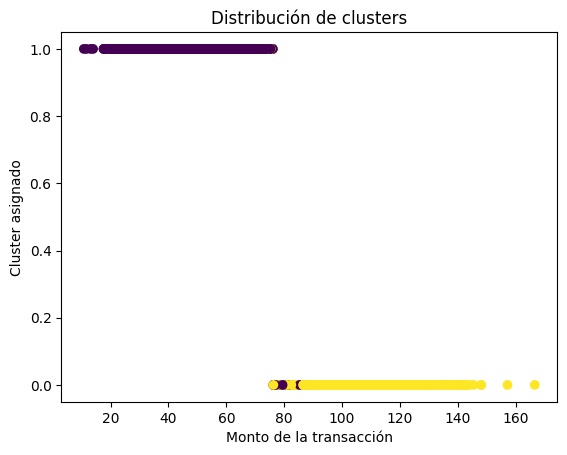

In [12]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reducir el conjunto de datos para hacer el clustering (sin la variable de clase)
X_clustering = datos_codificados.drop('clase', axis=1)

# Definir el modelo de K-Means con un número arbitrario de clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_clustering)

# Agregar los clusters a los datos originales
datos['cluster'] = kmeans.labels_

# Visualizar la distribución de clases en cada cluster
print(datos.groupby('cluster')['clase'].value_counts())

# Visualización de los clusters (utilizando solo dos dimensiones para simplicidad)
plt.scatter(datos['monto'], datos['cluster'], c=datos['clase'])
plt.xlabel('Monto de la transacción')
plt.ylabel('Cluster asignado')
plt.title('Distribución de clusters')
plt.show()
    

Este código ajusta KMeans con 2 clusters y predice los clusters para los datos de entrenamiento. Luego, grafica los puntos en un scatter plot, con los puntos coloreados según el cluster al que pertenecen. El eje X representa el monto de la transacción y el eje Y representa si la transacción es fraudulenta o no (0 para transacciones normales, 1 para transacciones fraudulentas).

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Seleccionar características relevantes
X_clustering = datos_codificados.drop('clase', axis=1)  # 'clase' es la columna de etiquetas reales

# 2. Preprocesar los datos (escalar características)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# 3. Entrenar el modelo K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# 4. Asignar una etiqueta a cada transacción
labels = kmeans.predict(X_scaled)
datos['cluster'] = labels  # Guardar las etiquetas generadas por K-Means en el conjunto de datos

# 5. Evaluar la precisión del modelo
# Como no sabemos cuál cluster es cuál, necesitamos ajustar las etiquetas si es necesario
# Calculamos la precisión para ambas posibles asignaciones de cluster
accuracy_option_1 = accuracy_score(datos['clase'], labels)  # Asignación original
accuracy_option_2 = accuracy_score(datos['clase'], np.abs(labels - 1))  # Invertimos los clusters

# Seleccionamos la mejor precisión de las dos opciones
accuracy = max(accuracy_option_1, accuracy_option_2)
print(f"Precisión del modelo K-Means: {accuracy:.2f}")


Precisión del modelo K-Means: 0.57


Utilizando técnicas de **clustering**, podemos agrupar transacciones en función de sus características observadas para identificar patrones similares que podrían indicar fraudes. En este caso, emplearemos el **algoritmo K-Means** para crear estos grupos o clusters. Dado que K-Means es un modelo **no supervisado**, generalmente no sabemos si los grupos formados corresponden a ciertas clases específicas. Sin embargo, como en este caso tenemos datos simulados y conocemos las etiquetas reales, podemos analizar si los clusters contienen una mayor proporción de transacciones fraudulentas.

### Implementación del Algoritmo K-Means

Para implementar un algoritmo de clustering K-Means en el conjunto de datos generado previamente, seguiremos los siguientes pasos:

1. **Seleccionar las características relevantes:** En este caso, las características relevantes para la detección de fraudes son el **monto**, **ubicación**, **horario** y **tipo de transacción**. Vamos a seleccionar estas características y eliminar cualquier otra que no sea relevante.

2. **Preprocesar los datos:** Para utilizar el algoritmo K-Means, es necesario escalar las características a un rango común para que todas tengan el mismo peso en el análisis. Esto se puede lograr utilizando la función `StandardScaler` de la librería `sklearn`, que ajusta los datos para que cada característica tenga media 0 y desviación estándar 1.

3. **Entrenar el modelo K-Means:** Utilizando la librería `sklearn`, entrenaremos el modelo K-Means en el conjunto de datos preprocesado. Estableceremos el número de clusters en 2, ya que queremos separar las transacciones en dos grupos.

4. **Asignar una etiqueta a cada transacción:** Después de entrenar el modelo, utilizaremos la función `predict` de K-Means para asignar una etiqueta a cada transacción. En este caso, solo sabemos que son grupos diferentes, pero no cuál grupo corresponde a las transacciones fraudulentas.

5. **Evaluar la precisión del modelo:** Para evaluar la precisión del modelo, compararemos las etiquetas asignadas por K-Means con las etiquetas reales de las transacciones. Calcularemos la precisión utilizando la función `accuracy_score` de `sklearn`.



In [14]:
### Código de Ejemplo en Python

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Seleccionar características relevantes
X_clustering = datos_codificados.drop('clase', axis=1)  # 'clase' es la columna de etiquetas reales

# 2. Preprocesar los datos (escalar características)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# 3. Entrenar el modelo K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# 4. Asignar una etiqueta a cada transacción
labels = kmeans.predict(X_scaled)
datos['cluster'] = labels  # Guardar las etiquetas generadas por K-Means en el conjunto de datos

# 5. Evaluar la precisión del modelo
# Como no sabemos cuál cluster es cuál, necesitamos ajustar las etiquetas si es necesario
# Calculamos la precisión para ambas posibles asignaciones de cluster
accuracy_option_1 = accuracy_score(datos['clase'], labels)  # Asignación original
accuracy_option_2 = accuracy_score(datos['clase'], np.abs(labels - 1))  # Invertimos los clusters

# Determinar cuál opción tiene mayor precisión y asignar los clusters acorde
if accuracy_option_1 > accuracy_option_2:
    accuracy = accuracy_option_1
    datos['predicted_class'] = labels  # Cluster 0 corresponde a la clase 0, cluster 1 a la clase 1
    print("Cluster 0: Transacciones normales, Cluster 1: Transacciones fraudulentas")
else:
    accuracy = accuracy_option_2
    datos['predicted_class'] = np.abs(labels - 1)  # Invertimos los clusters para que coincidan con las clases
    print("Cluster 1: Transacciones normales, Cluster 0: Transacciones fraudulentas")

print(f"Precisión del modelo K-Means: {accuracy:.2f}")

Cluster 0: Transacciones normales, Cluster 1: Transacciones fraudulentas
Precisión del modelo K-Means: 0.57


In [15]:
datos

,monto,ubicacion,horario,tipo,clase,cluster,predicted_class
0,34.175720,México,día,retiro,0.0,0,0
1,51.767621,México,noche,compra,0.0,0,0
2,52.317309,México,noche,retiro,0.0,1,1
3,69.669170,México,noche,retiro,0.0,1,1
4,42.681427,EEUU,noche,compra,0.0,0,0
...,...,...,...,...,...,...,...
10495,44.259174,México,día,compra,0.0,0,0
10496,49.587073,EEUU,día,compra,0.0,0,0
10497,43.005855,Canadá,noche,compra,0.0,1,1
10498,52.029230,México,día,compra,0.0,0,0


**Interpretación de Resultados**

La precisión obtenida indica qué tan bien K-Means ha agrupado las transacciones en categorías que coinciden con las etiquetas reales de fraude. Este análisis es útil como un primer paso para identificar patrones, aunque en general, los modelos supervisados son necesarios para una detección de fraudes más precisa.



In [16]:
# 6. Calcular la proporción de transacciones normales y fraudulentas en cada cluster
cluster_composition = datos.groupby('cluster')['clase'].value_counts(normalize=True).unstack()
cluster_composition.columns = ['Proporción Normal', 'Proporción Fraude']

# Mostrar la composición de cada cluster
print("\nComposición de cada cluster en términos de proporciones:")
print(cluster_composition)


Composición de cada cluster en términos de proporciones:
         Proporción Normal  Proporción Fraude
cluster                                      
0                 0.941593           0.058407
1                 0.968028           0.031972


Este ejemplo muestra que el cluster 0 tiene una mayor proporción de fraudes, lo cual podría interpretarse como el grupo que contiene más transacciones fraudulentas, pero estan relativamente equilibrados. Estoes coherente con que el accuracy del modelo es relativamente bajo, 57%

#### Definiendo el número de clusters

De todas maneras, aca a priori definimos 2 grupos. Al especificar dos grupos (clusters) en el modelo K-Means, estamos asumiendo que todas las transacciones se dividen en dos categorías claras (normales y fraudulentas). Sin embargo, en la práctica, podríamos observar una estructura más compleja en los datos de transacciones. Es posible que los fraudes no se limiten a una sola clase homogénea y que los patrones en los datos puedan formar más de dos grupos.

**Exploración de Diferentes Cantidades de Clusters**

Para investigar si más clusters mejoran el análisis, podríamos experimentar con diferentes valores de k y evaluar si los datos presentan agrupamientos adicionales que capturan otros patrones de comportamiento. Esto se hace comúnmente utilizando el método del codo (elbow method), que ayuda a identificar el número óptimo de clusters basándonos en la inercia o suma de distancias al cuadrado de los puntos a sus centroides. Este método nos permite observar cómo cambia la inercia a medida que aumentamos el número de clusters y elegir un valor de k en el que la inercia comienza a estabilizarse.

**Código para el Método del Codo**

A continuación, te muestro cómo aplicar el método del codo para decidir si aumentar el número de clusters podría ser beneficioso:

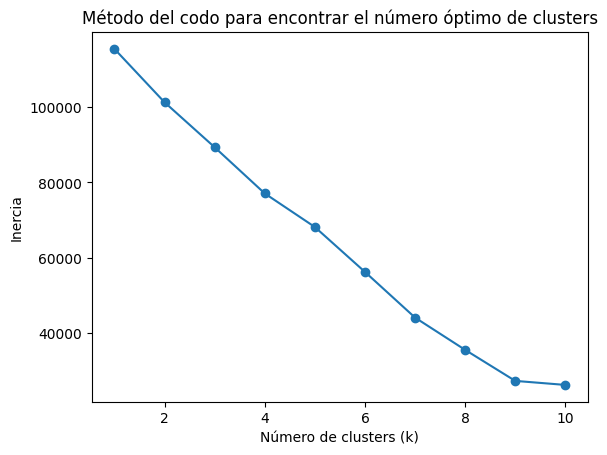

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Escalar los datos de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Lista para almacenar la inercia de cada valor de k
inertias = []

# Probar diferentes valores de k (por ejemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar la inercia contra el número de clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


**Implementación de K-Means con el Número Óptimo de Clusters**
Si encontramos que el número óptimo de clusters es mayor que 2, podemos ajustar el valor de k en el modelo K-Means y repetir el análisis. En este caso, podríamos investigar si hay patrones adicionales, como diferentes tipos de fraudes o transacciones normales que no siguen el mismo comportamiento.

Explorar más de dos clusters nos permite entender mejor la estructura de los datos y descubrir si existen múltiples tipos de patrones dentro de las transacciones fraudulentas y normales. Esta flexibilidad es especialmente útil en la detección de fraudes, donde los comportamientos fraudulentos pueden variar y no siempre siguen una sola categoría homogénea.

**Paso a Paso para Análisis con 4 Clusters**

En este caso, los clusters es lineal casi con la inercia, asi qú nuestros datos no parecen sugerir un numero óptimo a priori. Pero hagamos el caso con 4 clusters.

1. Entrenar el modelo K-Means con 4 clusters.
2. Asignar una etiqueta de cluster a cada transacción.
3. Comparar la composición de cada cluster (fraudulentas vs. normales) para ver si alguno tiene una mayor proporción de transacciones fraudulentas.

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Escalar los datos de características relevantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Entrenar el modelo K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Asignar cada transacción a uno de los 4 clusters
datos['cluster_4'] = kmeans.labels_

# Ver la composición de cada cluster en términos de transacciones fraudulentas y normales
cluster_composition = datos.groupby('cluster_4')['clase'].value_counts(normalize=True).unstack()
cluster_composition.columns = ['Proporción Normal', 'Proporción Fraude']

# Mostrar la composición de cada cluster
print(cluster_composition)


           Proporción Normal  Proporción Fraude
cluster_4                                      
0                   0.980134           0.019866
1                   0.959615           0.040385
2                   0.965882           0.034118
3                        NaN           1.000000


**Interpretación de Resultados**

La tabla `cluster_composition` mostrará la proporción de transacciones normales y fraudulentas en cada uno de los 4 clusters. Al analizar los resultados:

- Si un cluster tiene una proporción alta de fraudes (por ejemplo, 70% o más), podemos interpretarlo como un grupo que contiene principalmente transacciones fraudulentas.

- Distribución de fraudes: Si los fraudes están repartidos en varios clusters, esto puede sugerir que existen varios patrones de fraude con características distintas.

- En este caso todos los fraudulentos nos quedan en el cluster 3 (cuarto).  Este ejemplo muestra que no hay una receta única para este tipo de problemas.